In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("gs://leo_tapas/a40130_user_stats/part-00000-96b96ffd-e429-47dc-b43a-023684b8867c-c000.snappy.parquet")

In [5]:
np.unique(df.user_id).shape

(187829,)

In [6]:
df

,user_id,create_month,event_sum,event_count,sum_total_ink,sum_real_ink,sum_event_ink,count_ticket,count_series_id
0,10919,202305,300,1,27630.0,26730.0,900.0,91.0,11.0
1,28290,202305,300,1,0.0,0.0,0.0,2.0,1.0
2,29246,202305,300,1,25890.0,0.0,25890.0,280.0,115.0
3,43848,202305,300,1,107112.0,103762.0,3350.0,387.0,43.0
4,46713,202305,300,1,101805.0,83270.0,18535.0,341.0,24.0
...,...,...,...,...,...,...,...,...,...
617225,15356333,202401,300,1,810.0,0.0,810.0,2.0,1.0
617226,15356584,202401,1500,2,9000.0,4915.0,4085.0,23.0,1.0
617227,15356971,202401,1500,2,7650.0,4850.0,2800.0,5.0,1.0
617228,15357128,202401,500,1,810.0,0.0,810.0,3.0,1.0


In [14]:
totaldf = df.groupby("user_id")[['event_sum', 'event_count', 'sum_total_ink', 'sum_real_ink', 'sum_event_ink', 'count_ticket']].sum()

In [15]:
totaldf

,event_sum,event_count,sum_total_ink,sum_real_ink,sum_event_ink,count_ticket
user_id,,,,,,
1497,1800,3,94707.0,0.0,94707.0,20.0
1526,2600,5,95520.0,91520.0,4000.0,312.0
1572,6800,10,291159.0,278659.0,12500.0,196.0
1765,300,1,6900.0,5470.0,1430.0,101.0
2587,2500,4,14238.0,10832.0,3406.0,180.0
...,...,...,...,...,...,...
15357080,300,1,810.0,0.0,810.0,4.0
15357128,500,1,810.0,0.0,810.0,3.0
15357424,300,1,8730.0,5780.0,2950.0,15.0


1. Scatter Plot
2. QQ Plot
3. Histogram
4. Clustering

## Histograms

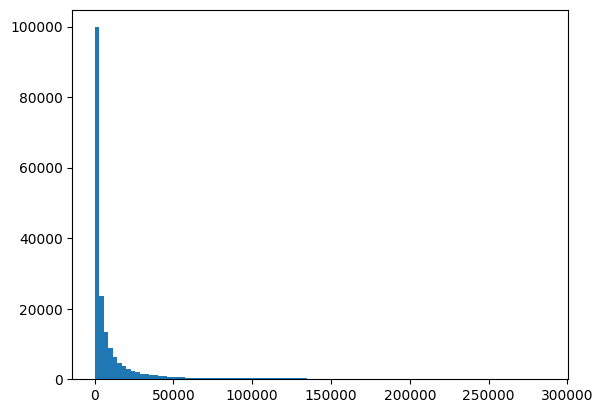

In [18]:
plt.hist(totaldf['event_sum'], bins=100)
plt.show()

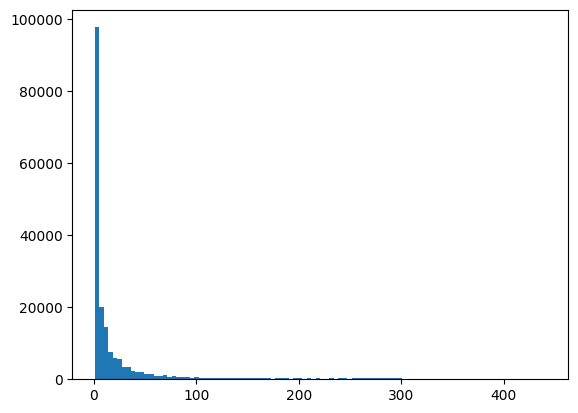

In [19]:
plt.hist(totaldf['event_count'], bins=100)
plt.show()

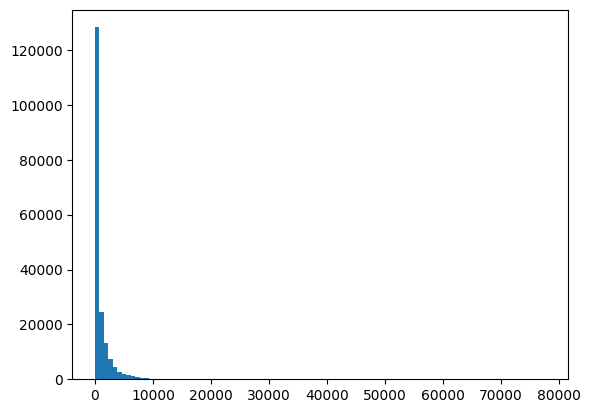

In [20]:
plt.hist(totaldf['count_ticket'], bins=100)
plt.show()

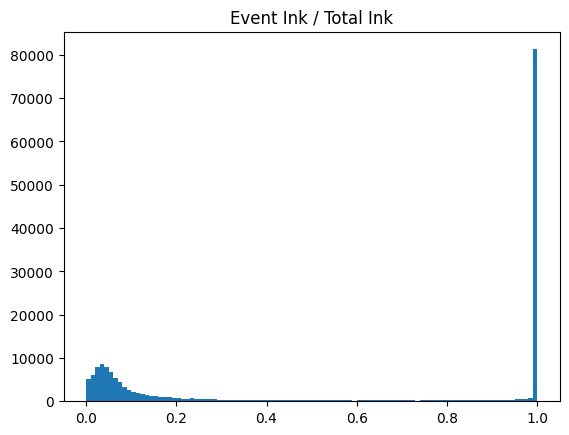

In [32]:
v = totaldf['sum_event_ink']/totaldf['sum_total_ink']
v = v[v<=1]
plt.hist(v, bins=100)
plt.title("Event Ink / Total Ink")
plt.show()


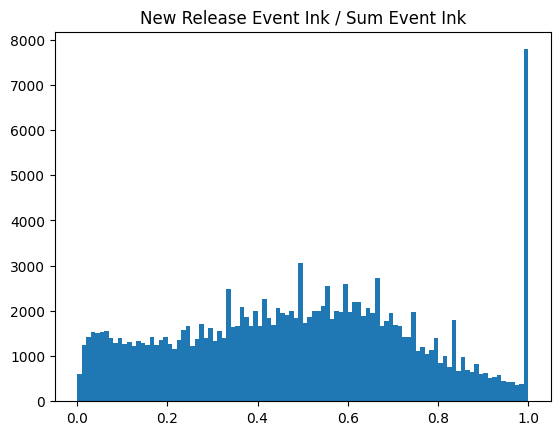

In [37]:
v = np.array(totaldf['event_sum']/totaldf['sum_event_ink'])
v = v[v<=1]
plt.hist(v, bins=100)
plt.title("New Release Event Ink / Sum Event Ink")
plt.show()

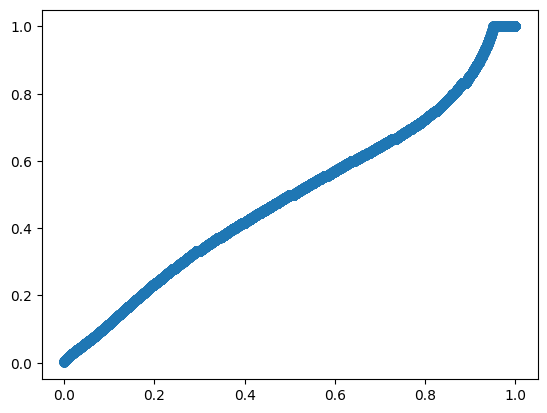

In [44]:
v = np.sort(v)
plt.scatter(np.argsort(v)/len(v),v)

In [46]:
# 신작 이벤트 잉크의 이벤트 잉크 비중
totaldf['event_sum'].sum()/totaldf['sum_event_ink'].sum()

0.3614329601092223

In [48]:
# 만원단위로
totaldf['event_sum'].sum()*1.2/10000
# 27억

273727.08

In [50]:
totaldf['sum_event_ink'].sum()*1.2/10000
# 75억

757338.45612

In [52]:
totaldf['sum_total_ink'].sum()*1.2/10000
# 302억

3020947.52868

In [55]:
timedf = df.groupby("create_month")[["event_sum", "event_count", "sum_total_ink", "sum_real_ink", "sum_event_ink"]].sum()

In [56]:
timedf

,event_sum,event_count,sum_total_ink,sum_real_ink,sum_event_ink
create_month,,,,,
202305,1113000,3710,9.086535e+07,4.119956e+07,49665787.0
202306,323228300,647723,3.183205e+09,2.279804e+09,903400762.0
202307,305402600,627554,3.454741e+09,2.583944e+09,870796680.0
202308,260008500,590555,3.185054e+09,2.368919e+09,816135013.0
202309,317037200,601609,2.903971e+09,2.098112e+09,805858716.0
202310,275199600,628202,2.856492e+09,2.111181e+09,745311612.0
202311,254755000,558375,3.051313e+09,2.347477e+09,703836193.0
202312,301034400,595035,3.510155e+09,2.713846e+09,796309374.0
202401,243280400,521655,2.938766e+09,2.318927e+09,619839664.0


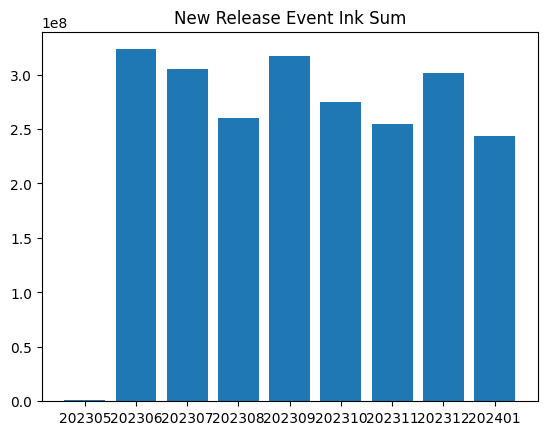

In [61]:
plt.bar(timedf.index, timedf.event_sum)
plt.title("New Release Event Ink Sum")
plt.show()

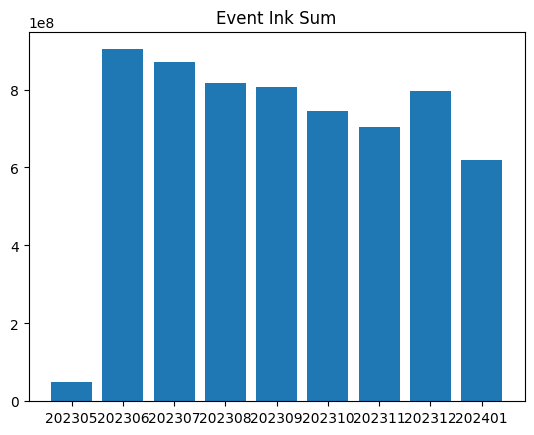

In [62]:
plt.bar(timedf.index, timedf.sum_event_ink)
plt.title("Event Ink Sum")
plt.show()

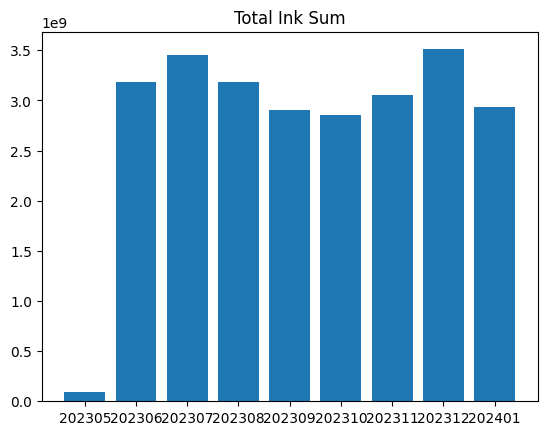

In [63]:
plt.bar(timedf.index, timedf.sum_total_ink)
plt.title("Total Ink Sum")
plt.show()

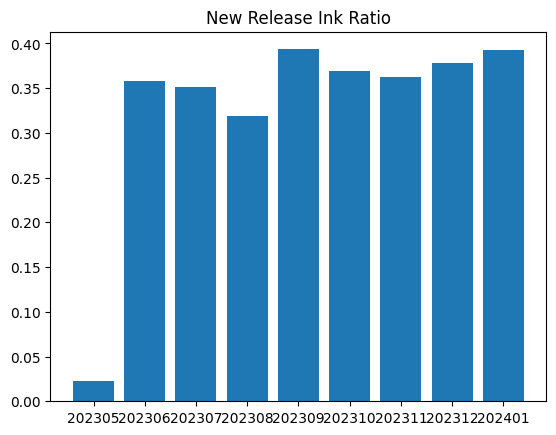

In [64]:
v = timedf.event_sum/timedf.sum_event_ink
v = v[v<=1]
plt.bar(timedf.index, v)
plt.title("New Release Ink Ratio")
plt.show()

In [65]:
seriesdf = pd.read_parquet("gs://leo_tapas/series_details_20231218/raw/part-00000-d54af644-897c-43e8-94b8-8bf3a250693d-c000.snappy.parquet")

In [67]:
sdf = seriesdf.dropna()

In [68]:
sdf.earliest_dt_formatted

,series_id,series_title,earliest_dt,latest_dt,earliest_dt_formatted,latest_dt_formatted,amonth_later_dt,main_genre,meta_tag
1,133308.0,Summoner,20231006,20231008,2023-10-06,2023-10-08,2023-11-07,30.0,"Fantasy,Action,Drama,Comedy,High Fantasy,Adven..."
2,145100.0,DemON,20230921,20231120,2023-09-21,2023-11-20,2023-12-20,22.0,
3,186414.0,Villains Are Destined to Die,20230905,20230908,2023-09-05,2023-09-08,2023-10-08,29.0,"Romance,Fantasy,Romance Fantasy,Ladies With Sw..."
4,191178.0,The Monstrous Duke's Adopted Daughter,20231205,20231207,2023-12-05,2023-12-07,2024-01-06,29.0,"Fantasy,Romance,Romance Fantasy,Family,Meek bu..."
5,193584.0,Descent of the Demon Master,20231130,20231201,2023-11-30,2023-12-01,2023-12-31,30.0,"Action,Fantasy,Action Fantasy,Contemporary Fan..."
...,...,...,...,...,...,...,...,...,...
348,271934.0,The Savior's 30-Day Unstoppable Streak,20231216,20231218,2023-12-16,2023-12-18,2024-01-17,30.0,
349,271943.0,The Vampire's Consort,20231204,20231207,2023-12-04,2023-12-07,2024-01-06,31.0,
350,271950.0,"Why Are You Sorry, Darling?",20231214,20231216,2023-12-14,2023-12-16,2024-01-15,31.0,
351,272022.0,The Reincarnated Assassin is a Swordmaster,20231213,20231216,2023-12-13,2023-12-16,2024-01-15,33.0,


In [73]:
pd.period_range(start="2023-09-30",end="2023-10-05",freq="M").values

array([Period('2023-09', 'M'), Period('2023-10', 'M')], dtype=object)

In [74]:
sdf.apply(lambda x: pd.period_range(start=x.earliest_dt_formatted, end=x.latest_dt_formatted, freq="M"))

AttributeError: 'Series' object has no attribute 'earliest_dt_formatted'

In [90]:
dates = []
for i in range(len(sdf)):
    dates.append(pd.date_range(start=sdf.earliest_dt_formatted.iloc[i], end=sdf.latest_dt_formatted.iloc[i]).strftime("%Y%m%d").values)

In [95]:
dsr = pd.Series(np.concatenate(dates)).value_counts().sort_index()

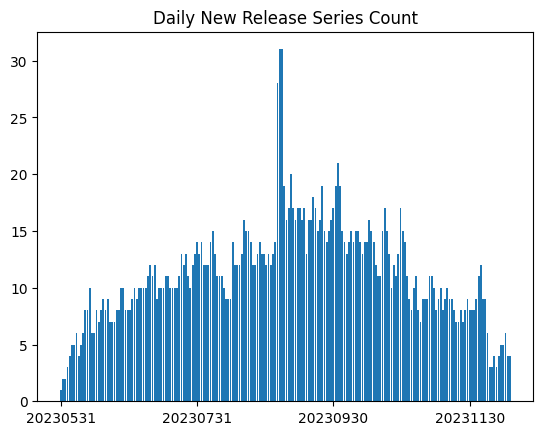

In [130]:
months = dsr.index.str[4:6]
midx = np.where(months[:-1]!=months[1:])[0]
plt.bar(dsr.index, dsr.values)
plt.xticks(midx[np.arange(len(midx),step=2)])
plt.title("Daily New Release Series Count")
plt.show()
plt.close()

In [137]:
months = []
for i in range(len(sdf)):
    months.append(pd.period_range(start=sdf.earliest_dt_formatted.iloc[i], end=sdf.latest_dt_formatted.iloc[i], freq="M").strftime("%Y%m").values)

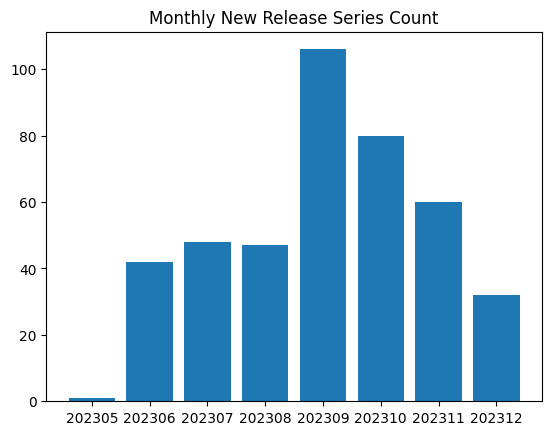

In [141]:
msr = pd.Series(np.concatenate(months)).value_counts().sort_index()
plt.bar(msr.index, msr.values)
# plt.xticks(np.arange(len(msr),step=int(len(msr)/5)))
plt.title("Monthly New Release Series Count")
plt.show()
plt.close()

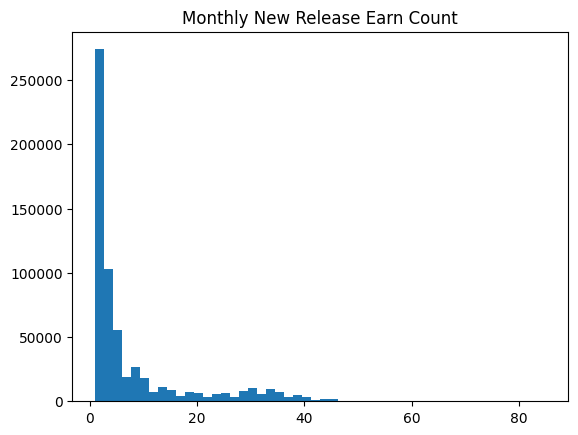

In [143]:
plt.hist(df.event_count, bins=50)
plt.title("Monthly New Release Earn Count")
plt.show()

In [144]:
len(df.loc[df.event_count>=20])/len(df)
# 월 20회 이상 신작이벤트 수령 비율

0.13477309916886737

In [145]:
len(np.unique(df.user_id.loc[df.event_count>=20]))/len(np.unique(df.user_id))
# 월 20회 이상 (한번이라도) 신작 이벤트를 받아본 유저수의 비율

0.10427569757598668

In [146]:
df.loc[df.event_count>=20].event_count.sum()/df.event_count.sum()
# 20회 이상 받는 사람들이 전체 신작 이벤트 수령 횟수에서의 비율

0.5470811311451993

(array([336., 272., 191., 279., 185., 217., 270., 190., 228., 105.]),
 array([  0. ,  20.1,  40.2,  60.3,  80.4, 100.5, 120.6, 140.7, 160.8,
        180.9, 201. ]),
 <BarContainer object of 10 artists>)

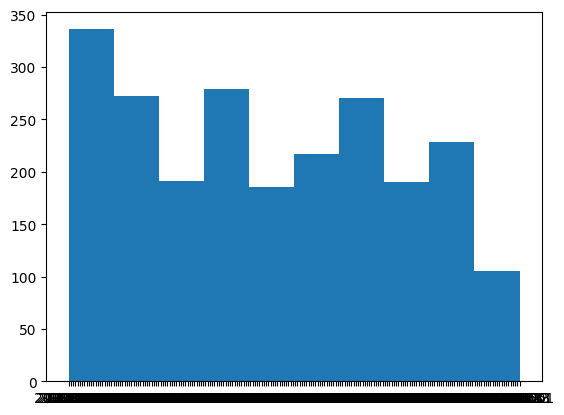

In [89]:
plt.bar(dates)